# Plotting CAMEL's surface brightness files

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Stacked Radial Xray Surface Brightness Profiles

In [2]:
def xray_profiles(label):
    # Open the HDF5 file
    path_to_file="../../Data/X-rays/CAMELS.Xray.hdf5"
    with h5py.File(path_to_file, "r") as f:
        # Number of halos (0 to 92, so 93 halos in total)
        halo_count = 93
        # Number of radial bins
        num_bins = 7
        
        # Initialize a zero array for xray brightness (shape: [halo_count, num_bins])
        xray_brightness = np.zeros((halo_count, num_bins))

        # Loop over each halo and load the corresponding data
        for halo_id in range(halo_count):
            halo_str = f"halo_{halo_id:03d}"  # Halo IDs are zero-padded to 3 digits (e.g., "halo_000")
            
            # Load the X-ray surface brightness for the current halo
            try:
                xray_data = f["IllustrisTNG"][label]['snap_032'][halo_str]['SIMPUTAnalysis']['L_0.5_2.0keV_Dens'][:]
                if xray_data.shape != (num_bins,):  # Sanity check for expected shape
                    print(f"Unexpected data shape for {halo_str}, skipping.")
                    continue
                xray_brightness[halo_id, :] = xray_data  # Store the data for the current halo
            except KeyError:
                print(f"Data for {halo_str} not found, skipping.")
                continue

        # Calculate mean and standard error of the mean (SEM) for the X-ray surface brightness
        xray_mean = np.mean(xray_brightness, axis=0)
        xray_sem = np.std(xray_brightness, axis=0, ddof=1) / np.sqrt(halo_count)

        # Save the results to a .npz file
        np.savez(f"xray_combined_{label}.npz", 
                 xray_mean=xray_mean,
                 xray_sem=xray_sem)

        print(f"Saved combined X-ray profile for {label} to xray_combined_{label}.npz")

In [3]:
labels = ['EX_0', 'EX_1', 'EX_2', 'EX_3']

xray_profiles(labels[0])
xray_profiles(labels[1])
xray_profiles(labels[2])
xray_profiles(labels[3])

Data for halo_038 not found, skipping.
Data for halo_054 not found, skipping.
Data for halo_085 not found, skipping.
Data for halo_086 not found, skipping.
Data for halo_089 not found, skipping.
Data for halo_091 not found, skipping.
Saved combined X-ray profile for EX_0 to xray_combined_EX_0.npz
Data for halo_030 not found, skipping.
Data for halo_047 not found, skipping.
Data for halo_051 not found, skipping.
Data for halo_055 not found, skipping.
Data for halo_065 not found, skipping.
Data for halo_071 not found, skipping.
Data for halo_073 not found, skipping.
Data for halo_077 not found, skipping.
Data for halo_085 not found, skipping.
Data for halo_086 not found, skipping.
Data for halo_087 not found, skipping.
Data for halo_088 not found, skipping.
Data for halo_089 not found, skipping.
Data for halo_090 not found, skipping.
Data for halo_091 not found, skipping.
Data for halo_092 not found, skipping.
Saved combined X-ray profile for EX_1 to xray_combined_EX_1.npz
Data for halo_

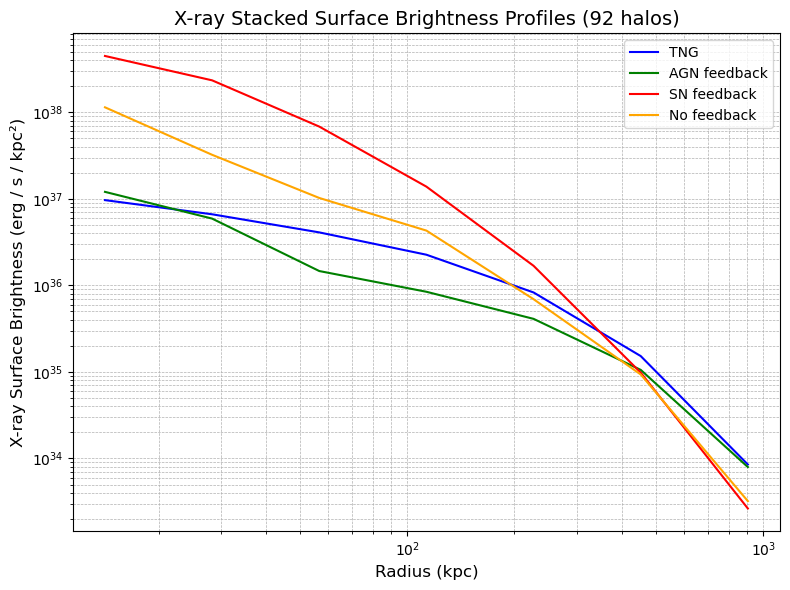

In [4]:
rbins = np.array([10., 20., 40., 80., 160., 320., 640., 1280.])
bin_centers = np.sqrt(rbins[:-1] * rbins[1:])
colors = ['blue', 'green', 'red', 'orange']
labels = ['EX_0', 'EX_1', 'EX_2', 'EX_3']
plt.figure(figsize=(8, 6))
label2 = ["TNG", "AGN feedback", "SN feedback", "No feedback"]
for label, color, i in zip(labels, colors, label2):
    data = np.load(f"xray_combined_{label}.npz")
    xray_mean = data['xray_mean']
    xray_sem = data['xray_sem']

    plt.plot(bin_centers, xray_mean, label=i, color=color)
    #plt.fill_between(bin_centers, xray_mean - xray_sem, xray_mean + xray_sem,
    #                 color=color, alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (kpc)', fontsize=12)
plt.ylabel('X-ray Surface Brightness (erg / s / kpc²)', fontsize=12)
plt.title('X-ray Stacked Surface Brightness Profiles (92 halos)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("xray_surfacebrightness_CAMELS.png", dpi = 900)
plt.tight_layout()
plt.show()


## Xray Surface Brightness Profiles of Halo 0

In [5]:
with h5py.File("../../Data/X-rays/CAMELS.Xray.hdf5", "r") as f:
    rbins = f['Rbins'][:]
    EX00 = f["IllustrisTNG"]["EX_0"]['snap_032']['halo_000']['SIMPUTAnalysis']['L_0.5_2.0keV_Dens'][:]
    EX01 = f["IllustrisTNG"]["EX_1"]['snap_032']['halo_000']['SIMPUTAnalysis']['L_0.5_2.0keV_Dens'][:]
    EX02 = f["IllustrisTNG"]["EX_2"]['snap_032']['halo_000']['SIMPUTAnalysis']['L_0.5_2.0keV_Dens'][:]
    EX03 = f["IllustrisTNG"]["EX_3"]['snap_032']['halo_000']['SIMPUTAnalysis']['L_0.5_2.0keV_Dens'][:]

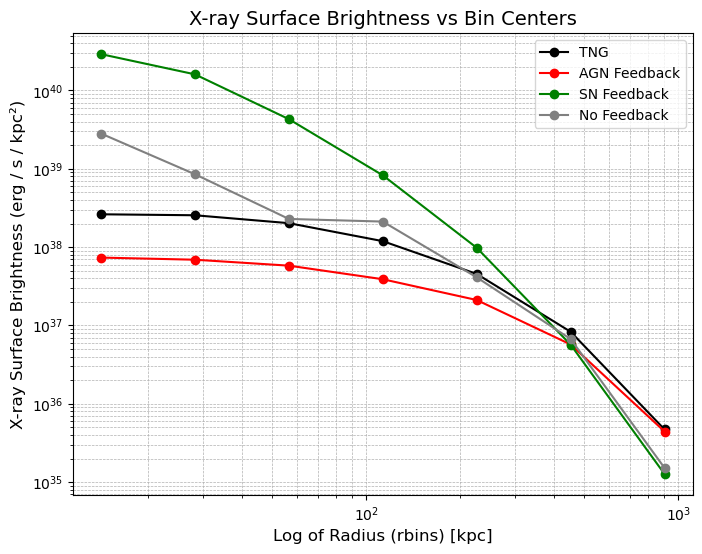

In [6]:

bin_centers = np.sqrt(rbins[:-1] * rbins[1:])

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the data
plt.plot(bin_centers, EX00, marker='o', linestyle='-', color='k', label="TNG")
plt.plot(bin_centers, EX01, marker='o', linestyle='-', color='r', label="AGN Feedback")
plt.plot(bin_centers, EX02, marker='o', linestyle='-', color='g', label="SN Feedback")
plt.plot(bin_centers, EX03, marker='o', linestyle='-', color='grey', label="No Feedback")

# Set the x-axis to a logarithmic scale
plt.xscale('log')
plt.yscale('log')
# Set axis labels and title
plt.xlabel('Log of Radius (rbins) [kpc]', fontsize=12)
plt.ylabel('X-ray Surface Brightness (erg / s / kpc²)', fontsize=12)
plt.title('X-ray Surface Brightness vs Bin Centers', fontsize=14)
plt.legend()

# Display grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()